In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size= BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

[[[162. 156. 160.]
  [158. 152. 156.]
  [153. 147. 151.]
  ...
  [153. 144. 147.]
  [142. 133. 136.]
  [182. 173. 176.]]

 [[152. 146. 150.]
  [148. 142. 146.]
  [144. 138. 142.]
  ...
  [159. 150. 151.]
  [132. 123. 124.]
  [156. 147. 148.]]

 [[146. 140. 144.]
  [141. 135. 139.]
  [137. 131. 135.]
  ...
  [155. 147. 144.]
  [127. 119. 116.]
  [142. 134. 131.]]

 ...

 [[182. 177. 181.]
  [221. 216. 220.]
  [228. 223. 227.]
  ...
  [193. 184. 187.]
  [182. 173. 176.]
  [192. 183. 186.]]

 [[195. 190. 194.]
  [223. 218. 222.]
  [228. 223. 227.]
  ...
  [198. 189. 192.]
  [186. 177. 180.]
  [189. 180. 183.]]

 [[198. 193. 197.]
  [208. 203. 207.]
  [211. 206. 210.]
  ...
  [200. 191. 194.]
  [193. 184. 187.]
  [188. 179. 182.]]]
(256, 256, 3)
(32, 256, 256, 3)
[0 0 0 1 1 0 0 1 0 1 1 0 0 0 2 1 0 0 0 1 1 0 1 0 1 1 1 2 1 1 0 1]


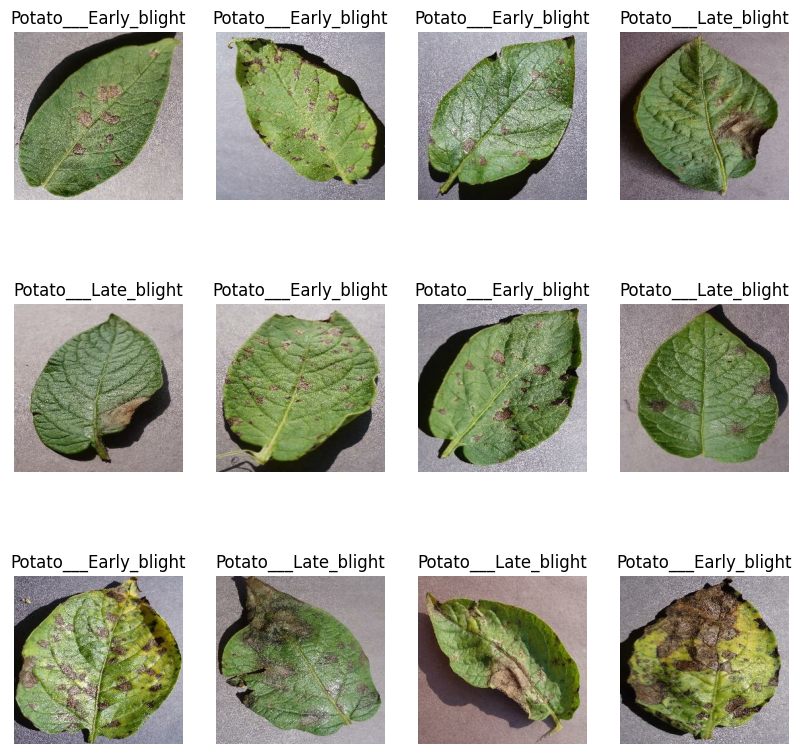

In [6]:
plt.figure(figsize = (10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    print(image_batch[0].numpy())
    print(image_batch[0].shape)
    print(image_batch.shape)
    print(label_batch.numpy())

In [7]:
len(dataset)

68

In [8]:
80% ==> training
20% ==> 10% validation, 10% test

SyntaxError: invalid syntax (829920516.py, line 1)

In [9]:
train_size = 0.8
len(dataset) * train_size

54.400000000000006

In [10]:
train_ds = dataset.take(54)
len(train_ds)

54

In [11]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [12]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [13]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [14]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [15]:
def get_dataset_partitions_tf(ds,train_split=0.8, val_split=0.1, test_split= 0.1, shuffle=True, shuffle_size = 10000 ):
    ds_size = len(ds)
    if shuffle :
        ds = ds.shuffle(shuffle_size, seed= 12 )
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size )
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds
   

In [16]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [17]:
len(train_ds)

54

In [18]:
len(val_ds)

6

In [19]:
len(test_ds)

8

In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [21]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(256, 256),
    layers.Rescaling(1.0/255)
])

In [22]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [23]:
input_shape=(BATCH_SIZE,IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu'),  
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),  
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),  
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),  
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),  
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),  
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [24]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [26]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.4592 - loss: 0.9256 - val_accuracy: 0.4647 - val_loss: 0.8607
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.5892 - loss: 0.8112 - val_accuracy: 0.6800 - val_loss: 0.6508
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.7495 - loss: 0.5721 - val_accuracy: 0.7841 - val_loss: 0.5381
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.7857 - loss: 0.4845 - val_accuracy: 0.7610 - val_loss: 0.4809
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.8257 - loss: 0.3983 - val_accuracy: 0.8854 - val_loss: 0.2933
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.8853 - loss: 0.2830 - val_accuracy: 0.9172 - val_loss: 0.2069
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.9217 - loss: 0.2129 - val_accuracy: 0.9074 - val_loss: 0.2232
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.9427 - loss: 0.1658 - val_accuracy: 0.8981 - val_loss

In [27]:
scores = model.evaluate(test_ds)

54/54 ━━━━━━━━━━━━━━━━━━━━ 18s 335ms/step - accuracy: 0.8804 - loss: 0.3827


In [28]:
scores

[0.4601322114467621, 0.8657407164573669]

In [29]:
history

In [30]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [31]:
history.history['accuracy']

[0.48321759700775146,
 0.6342592835426331,
 0.7714120149612427,
 0.8032407164573669,
 0.8553240895271301,
 0.9114583134651184,
 0.9265046119689941,
 0.9317129850387573,
 0.9658564925193787,
 0.9641203880310059,
 0.9733796119689941,
 0.9502314925193787,
 0.9762731194496155,
 0.9751157164573669,
 0.9554398059844971,
 0.9728009104728699,
 0.9861111044883728,
 0.9658564925193787,
 0.9814814925193787,
 0.9826388955116272,
 0.9820601940155029,
 0.9855324029922485,
 0.9745370149612427,
 0.9728009104728699,
 0.9866898059844971,
 0.9872685074806213,
 0.9866898059844971,
 0.9820601940155029,
 0.9693287014961243,
 0.9768518805503845,
 0.9890046119689941,
 0.9901620149612427,
 0.9722222089767456,
 0.9924768805503845,
 0.9953703880310059,
 0.9861111044883728,
 0.9739583134651184,
 0.9918981194496155,
 0.9947916865348816,
 0.9809027910232544,
 0.9890046119689941,
 0.9936342835426331,
 0.9971064925193787,
 0.9918981194496155,
 0.9756944179534912,
 0.9959490895271301,
 0.9918981194496155,
 0.992476880

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

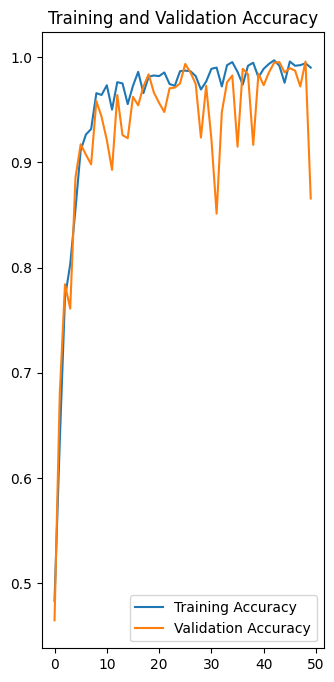

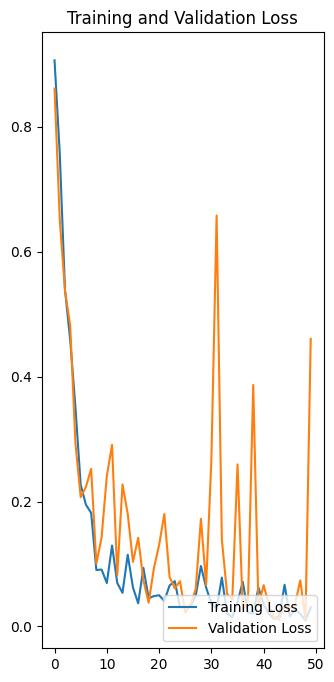

In [33]:
plt.figure(figsize =(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.figure(figsize =(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

In [38]:
np.argmax([9.999949e-01,5.151478e-06,4.034679e-15])

0

first image to predict
first image's acual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
[1.7329405e-01 8.2670581e-01 9.6286307e-08]
Predicted label: Potato___Late_blight


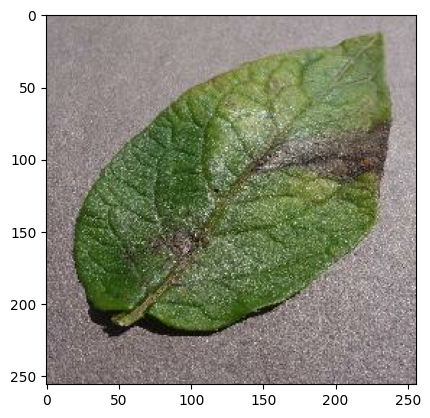

In [39]:
import numpy as np 
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0]
    print("first image to predict")
    plt.imshow(first_image)
    print("first image's acual label:", class_names[first_label])
    batch_prediction = model.predict(images_batch)
    print(batch_prediction[0])
    print("Predicted label:",class_names[np.argmax(batch_prediction[0])])

In [40]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


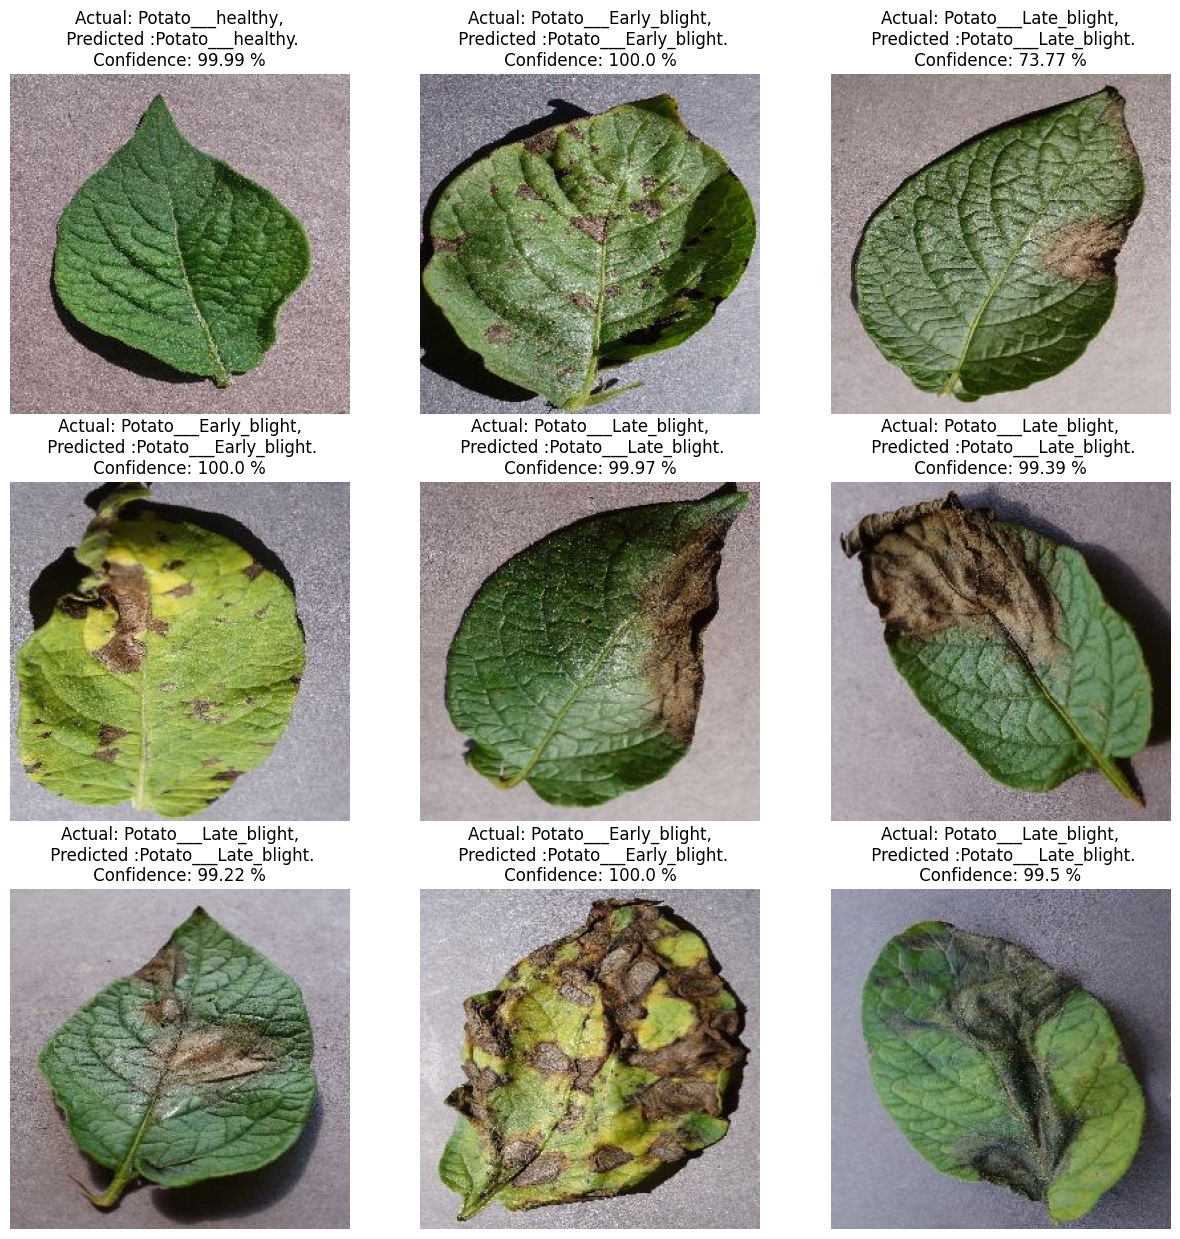

In [41]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class= class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted :{predicted_class}.\n Confidence: {confidence} % ")
        plt.axis("off")
        

In [49]:
import os
model_version= max([int(i) for i in os.listdir("../models") + [0]]) + 1
model.export(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets


Saved artifact at '../models/2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2285072949200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2285072952464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2285072954768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2285072955728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2285072955920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2285072956688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2285072956304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2285072957072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2285072956112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2285072956496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2285072956880: TensorSpec(shape=(), dty